### 1. Neural Networks
A Neural Network is a predictive model that imitates the structure of a biological brain

### 2. Performance

The performance of a Neural Network is evaluated by its loss function, which measures how well the neural network models the training data

### 3. Cleaning

In [96]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
import torch.nn as nn
import torch.nn.functional as F 


In [97]:
dataframe = pd.read_csv('week_07/Credit_Card.csv')
label_df = pd.read_csv('week_07/Credit_card_label.csv')
cc_df = pd.merge(dataframe, label_df, on='Ind_ID')

In [98]:
def standardize_column_names(df: pd.DataFrame) -> pd.DataFrame:
    """
    Standardizes column names
    """
    cc_df.columns = df.columns.str.strip()  
    cc_df.columns = df.columns.str.lower() 

def fill_nan(df: pd.DataFrame, col: str, tendency: str) -> pd.Series:
    '''
    takes in a dataframe, column, and what value to use in place of NaN values
    '''
    if tendency == 'mean':
        df[col] = df[col].fillna(df[col].mean())
    elif tendency == 'median':
        df[col] = df[col].fillna(df[col].median())
    elif tendency == 'mode':
        df[col] = df[col].fillna(df[col].mode().iloc[0])

def encode_cat(df: pd.DataFrame, col: str) -> pd.Series:
    '''
    encodes categorical values
    '''
    val_map = {}
    code = 0
    for value in df[col].unique():
        if value not in val_map:
            val_map[value] = code
            code+=1
    df[col] = df[col].map(val_map)
    
def clean(cc_df: pd.DataFrame) -> pd.DataFrame:
    """
    Performs all cleaning operations on cc_df 
    """
    
    standardize_column_names(cc_df)

    # drop unnecessary columns
    cc_df = cc_df.drop(['type_occupation', 'phone'], axis=1)

    # fill NaN values
    fill_nan(cc_df, 'gender', 'mode')
    fill_nan(cc_df, 'annual_income', 'median')
    fill_nan(cc_df, 'birthday_count', 'median')

    # convert negative numbers to positive values
    cc_df['birthday_count'] = cc_df['birthday_count'].astype(int)
    cc_df['annual_income'] = cc_df['annual_income'].astype(int)
    
    # encode categorical columns
    categorical_cols = ['gender', 'car_owner', 'propert_owner', 
                        'type_income', 'education', 'marital_status', 
                        'housing_type']
    for col in categorical_cols:
        encode_cat(cc_df, col)
    
    return cc_df
df = clean(cc_df)
df.head(10)

,ind_id,gender,car_owner,propert_owner,children,annual_income,type_income,education,marital_status,housing_type,birthday_count,employed_days,mobile_phone,work_phone,email_id,family_members,label
0,5008827,0,0,0,0,180000,0,0,0,0,-18772,365243,1,0,0,2,1
1,5009744,1,0,1,0,315000,1,0,0,0,-13557,-586,1,1,0,2,1
2,5009746,1,0,1,0,315000,1,0,0,0,-15661,-586,1,1,0,2,1
3,5009749,1,0,1,0,166500,1,0,0,0,-13557,-586,1,1,0,2,1
4,5009752,1,0,1,0,315000,1,0,0,0,-13557,-586,1,1,0,2,1
5,5009753,1,0,1,0,315000,0,0,0,0,-13557,-586,1,1,0,2,1
6,5009754,1,0,1,0,315000,1,0,0,0,-13557,-586,1,1,0,2,1
7,5009894,1,1,1,0,180000,0,1,0,0,-22134,365243,1,0,0,2,1
8,5010864,0,0,0,1,450000,1,1,0,0,-18173,-678,1,0,1,3,1
9,5010868,0,0,0,1,450000,0,1,0,0,-18173,-678,1,0,1,3,1


Cleaning process:
 - standardize column names
 - replace empty values
 - encode categorical data
 - convert float values to integers, since they represent whole numbers anyway (ending in .0)


 


### 4. Models

In [99]:
X = df.drop('label', axis=1).values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)
y_train = torch.LongTensor(y_train)

print(X_train)

tensor([[5.0613e+06, 1.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         3.0000e+00],
        [5.0540e+06, 1.0000e+00, 0.0000e+00,  ..., 1.0000e+00, 0.0000e+00,
         2.0000e+00],
        [5.1169e+06, 0.0000e+00, 0.0000e+00,  ..., 1.0000e+00, 0.0000e+00,
         2.0000e+00],
        ...,
        [5.0685e+06, 1.0000e+00, 1.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         3.0000e+00],
        [5.0293e+06, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         2.0000e+00],
        [5.1183e+06, 1.0000e+00, 1.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         2.0000e+00]])


Epoch 1: Loss = 126281.703125
Epoch 11: Loss = 7849.65576171875
Epoch 21: Loss = 5405.646484375
Epoch 31: Loss = 2997.350341796875
Epoch 41: Loss = 2759.1904296875
Epoch 51: Loss = 1025.8961181640625
Epoch 61: Loss = 397.0483703613281
Epoch 71: Loss = 1933.0035400390625
Epoch 81: Loss = 948.837158203125
Epoch 91: Loss = 269.7419738769531
Epoch 101: Loss = 3532.974609375
Epoch 111: Loss = 2055.583984375
Epoch 121: Loss = 1793.3992919921875
Epoch 131: Loss = 445.35528564453125
Epoch 141: Loss = 948.49609375
Epoch 151: Loss = 981.3274536132812
Epoch 161: Loss = 796.707275390625
Epoch 171: Loss = 126.5962905883789
Epoch 181: Loss = 993.6242065429688
Epoch 191: Loss = 3430.145263671875
Epoch 201: Loss = 606.35009765625
Epoch 211: Loss = 1177.50439453125
Epoch 221: Loss = 53.27217483520508
Epoch 231: Loss = 236.3928680419922
Epoch 241: Loss = 191.0908660888672
Epoch 251: Loss = 14.172287940979004
Epoch 261: Loss = 4.4132208824157715
Epoch 271: Loss = 1.1912562847137451
Epoch 281: Loss = 0.62

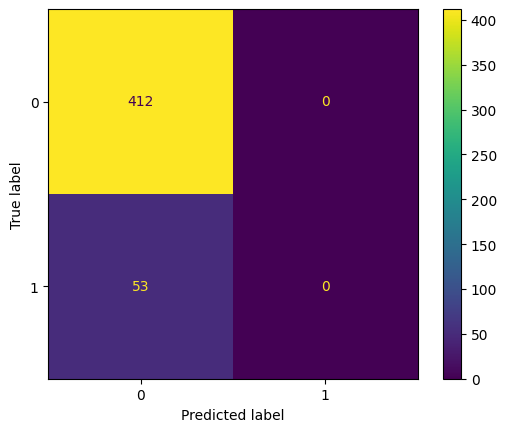

In [100]:
# Model Definition
class ANN_Model(nn.Module):
    def __init__(self, input_features=16, hidden1=20, hidden2=20, out_features=2):
        super().__init__()

        self.layer_1_connection = nn.Linear(input_features, hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)

    def forward(self, x):
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

def train_ann():
    torch.manual_seed(42)
    ann = ANN_Model()

    loss_function = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(ann.parameters(), lr=0.01)

    final_loss = []
    n_epochs = 500

    for epoch in range(n_epochs):
        y_pred = ann.forward(X_train)
        loss = loss_function(y_pred, y_train)
        final_loss.append(loss.item())  

        if epoch % 10 == 1:
            print(f"Epoch {epoch}: Loss = {loss.item()}")

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return ann

def predict_and_plot_confusion_matrix(model):
    y_pred = []

    with torch.no_grad(): 
        for i, data in enumerate(X_test):
            prediction = model(data)
            y_pred.append(prediction.argmax().item()) 

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

ann_model = train_ann()
predict_and_plot_confusion_matrix(ann_model)


In [101]:
#svm for comparison
def svm_model(data: pd.DataFrame=df, col: str='label'):
    X = df.drop('label', axis=1)
    y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    classifier = SVC(kernel='linear', random_state=42)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    return accuracy
    
svm_model()

0.9075268817204301

the neural network had better performance than SVM, but im skeptical that i haven't properly tuned the model to prevent overfitting